In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.optimizers.legacy import Adam, RMSprop, SGD
from tensorflow.keras import activations
from tensorflow.keras.layers import ReLU


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

try:
    import scikeras
except ImportError:
    !python -m pip install scikeras
from scikeras.wrappers import KerasRegressor

from scikeras.wrappers import KerasClassifier
import pandas as pd
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train / 255
x_test = x_test / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


x_train, x_valid, y_train_cat, y_valid = train_test_split(x_train, y_train_cat, test_size=10000, random_state=42)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train_20000, _, y_train_20000, _ = train_test_split(x_train, y_train_cat, train_size=20000, random_state=42)

In [14]:
def create_model(optimizer=Adam(), activation='relu',loss = 'categorical_crossentropy', bias=True):
    model = keras.Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(64, activation=activation, use_bias=bias),
        Dense(10, activation='softmax', use_bias=bias)
    ])
    model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])
    return model


In [15]:
model =  create_model()

In [16]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3250 - accuracy: 0.9088 - val_loss: 0.2014 - val_accuracy: 0.9410
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1656 - accuracy: 0.9528 - val_loss: 0.1459 - val_accuracy: 0.9574
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1237 - accuracy: 0.9634 - val_loss: 0.1226 - val_accuracy: 0.9640
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0985 - accuracy: 0.9706 - val_loss: 0.1202 - val_accuracy: 0.9631
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0806 - accuracy: 0.9762 - val_loss: 0.1003 - val_accuracy: 0.9692
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0961 - val_accuracy: 0.9696
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0981 - val_accuracy

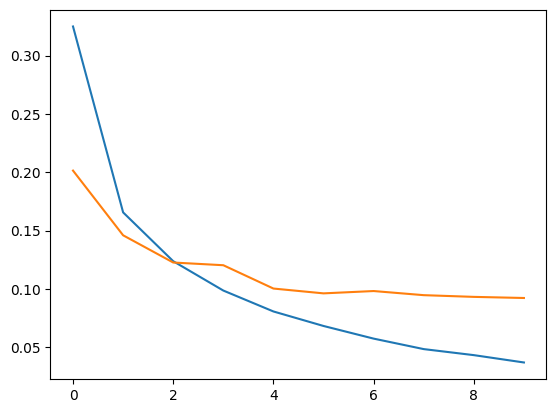

313/313 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9727


[0.0924324244260788, 0.9726999998092651]

In [17]:
his = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_valid, y_valid))


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

model.evaluate(x_test, y_test_cat)

In [18]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9727


[0.0924324244260788, 0.9726999998092651]

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4]
[7 2 1 0 4]
Значение сети: 8


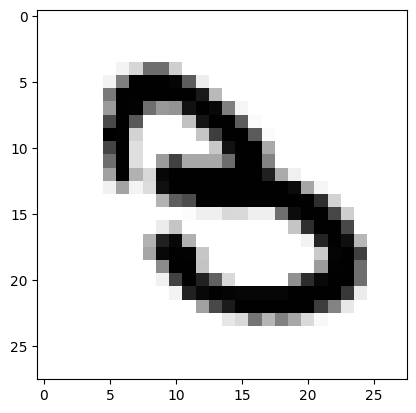

Значение сети: 9


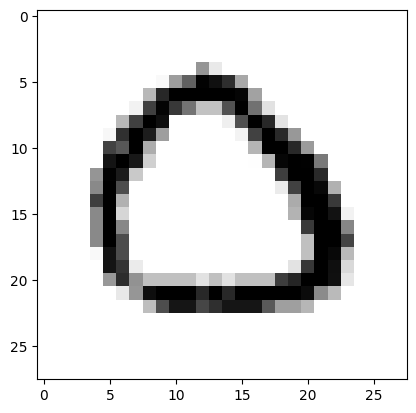

Значение сети: 2


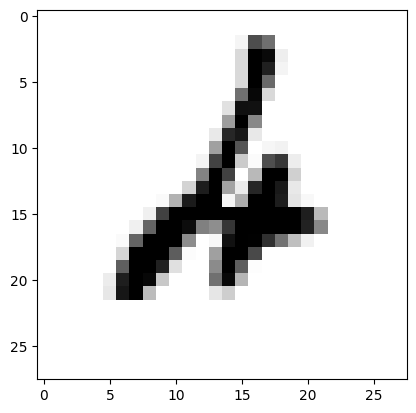

Значение сети: 3


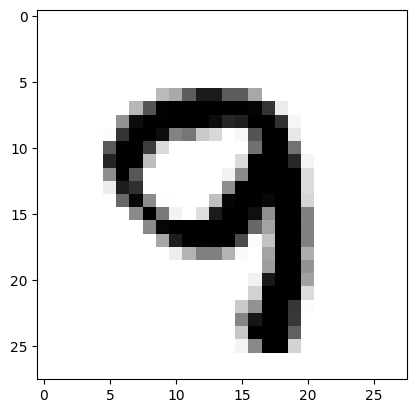

Значение сети: 7


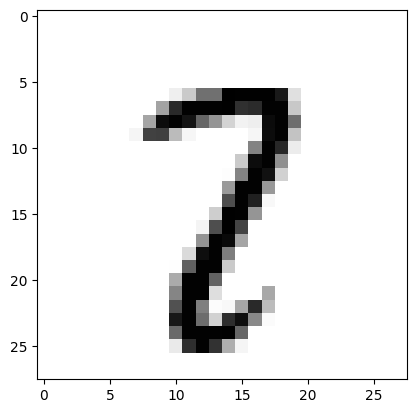

In [19]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:5])
print(y_test[:5])

mask = pred == y_test

x_false = x_test[~mask]
y_false = x_test[~mask]
p_false = pred[~mask]

for i in range(5):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

In [21]:
his_20000 = model.fit(x_train_20000, y_train_20000,  epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.0955 - val_accuracy: 0.9740
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.1018 - val_accuracy: 0.9724
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0070 - accuracy: 0.9990 - val_loss: 0.1191 - val_accuracy: 0.9675
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0081 - accuracy: 0.9983 - val_loss: 0.1056 - val_accuracy: 0.9730
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0043 - accuracy: 0.9998 - val_loss: 0.1203 - val_accuracy: 0.9707
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.1107 - val_accuracy: 0.9730
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.1127 - val_accuracy: 0.9731
Epoch 

[0.1134420782327652, 0.972000002861023]

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2452 - accuracy: 0.9277 - val_loss: 0.1654 - val_accuracy: 0.9521
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1343 - accuracy: 0.9613 - val_loss: 0.1254 - val_accuracy: 0.9632
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1047 - accuracy: 0.9696 - val_loss: 0.1171 - val_accuracy: 0.9638
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0849 - accuracy: 0.9750 - val_loss: 0.1027 - val_accuracy: 0.9682
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0711 - accuracy: 0.9787 - val_loss: 0.1048 - val_accuracy: 0.9682
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0619 - accuracy: 0.9815 - val_loss: 0.0997 - val_accuracy: 0.9693
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0968 - val_accuracy:

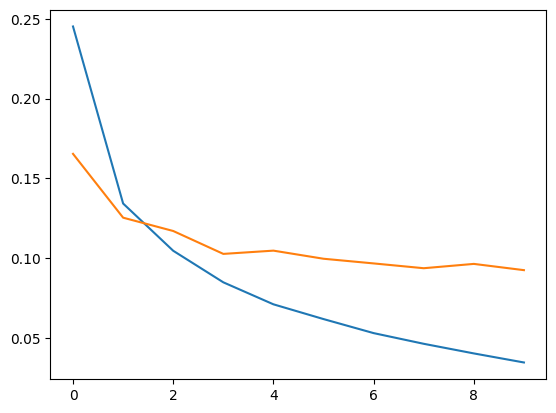

313/313 [==============================] - 1s 2ms/step - loss: 0.0937 - accuracy: 0.9707


[0.09365144371986389, 0.9707000255584717]

In [22]:
model =  create_model()
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

model.evaluate(x_test, y_test_cat)

In [9]:
model = KerasClassifier(model=create_model, verbose=1)

### 5

In [27]:
for act in ['relu', 'softmax', 'linear','tanh']:
  model =  create_model(activation=act)
  his = model.fit(x_train, y_train_cat,  epochs=10, validation_data=(x_valid, y_valid))

  print(act,' ',model.evaluate(x_test, y_test_cat))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2568 - accuracy: 0.9258 - val_loss: 0.1633 - val_accuracy: 0.9544
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1390 - accuracy: 0.9605 - val_loss: 0.1334 - val_accuracy: 0.9601
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1059 - accuracy: 0.9696 - val_loss: 0.1088 - val_accuracy: 0.9677
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0873 - accuracy: 0.9750 - val_loss: 0.1026 - val_accuracy: 0.9693
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0733 - accuracy: 0.9784 - val_loss: 0.1004 - val_accuracy: 0.9710
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0629 - accuracy: 0.9819 - val_loss: 0.0934 - val_accuracy: 0.9719
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9842 - val_loss: 0.0910 - val_accuracy

### 7

In [28]:
model =  create_model(loss='mean_squared_error')
his = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.0110 - accuracy: 0.9279 - val_loss: 0.0074 - val_accuracy: 0.9517
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0062 - accuracy: 0.9613 - val_loss: 0.0066 - val_accuracy: 0.9566
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0049 - accuracy: 0.9698 - val_loss: 0.0054 - val_accuracy: 0.9656
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0041 - accuracy: 0.9753 - val_loss: 0.0053 - val_accuracy: 0.9650
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0036 - accuracy: 0.9785 - val_loss: 0.0047 - val_accuracy: 0.9698
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0031 - accuracy: 0.9809 - val_loss: 0.0044 - val_accuracy: 0.9722
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0027 - accuracy: 0.9839 - val_loss: 0.0047 - val_accuracy:

[0.004418617580085993, 0.9697999954223633]

In [29]:
model =  create_model(loss='binary_crossentropy')
his = model.fit(x_train, y_train_cat,  epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9143 - val_loss: 0.0405 - val_accuracy: 0.9415
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0355 - accuracy: 0.9501 - val_loss: 0.0328 - val_accuracy: 0.9547
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0292 - accuracy: 0.9601 - val_loss: 0.0296 - val_accuracy: 0.9579
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0256 - accuracy: 0.9659 - val_loss: 0.0274 - val_accuracy: 0.9620
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0228 - accuracy: 0.9700 - val_loss: 0.0265 - val_accuracy: 0.9628
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9728 - val_loss: 0.0255 - val_accuracy: 0.9657
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0193 - accuracy: 0.9751 - val_loss: 0.0244 - val_accuracy:

[0.02365819923579693, 0.9682999849319458]

### 6

In [30]:
model =  create_model(bias=False)
his = model.fit(x_train, y_train_cat,  epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2398 - accuracy: 0.9293 - val_loss: 0.1570 - val_accuracy: 0.9534
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1286 - accuracy: 0.9626 - val_loss: 0.1178 - val_accuracy: 0.9648
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0973 - accuracy: 0.9708 - val_loss: 0.1030 - val_accuracy: 0.9696
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0791 - accuracy: 0.9765 - val_loss: 0.1051 - val_accuracy: 0.9683
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0913 - val_accuracy: 0.9713
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0472 - accuracy: 0.9859 - val_loss: 0.0925 - val_accuracy:

[0.09028208255767822, 0.9728999733924866]

In [31]:
model =  create_model()
his = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2473 - accuracy: 0.9261 - val_loss: 0.1528 - val_accuracy: 0.9542
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1278 - accuracy: 0.9625 - val_loss: 0.1233 - val_accuracy: 0.9617
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0938 - accuracy: 0.9732 - val_loss: 0.1061 - val_accuracy: 0.9684
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0765 - accuracy: 0.9772 - val_loss: 0.0925 - val_accuracy: 0.9705
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0618 - accuracy: 0.9817 - val_loss: 0.0946 - val_accuracy: 0.9694
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9840 - val_loss: 0.0866 - val_accuracy: 0.9742
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0447 - accuracy: 0.9868 - val_loss: 0.0844 - val_accuracy:

[0.0958351343870163, 0.9733999967575073]

### 8

In [32]:
batch_sizes = [16, 32, 64, 128, 256]
score = []
for batch_size in batch_sizes:
    model = create_model()
    model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=10, validation_data=(x_valid, y_valid))
    score.append({batch_size: model.evaluate(x_test, y_test_cat, verbose=0)})

Epoch 1/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.2252 - accuracy: 0.9342 - val_loss: 0.1438 - val_accuracy: 0.9585
Epoch 2/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.1277 - accuracy: 0.9625 - val_loss: 0.1232 - val_accuracy: 0.9643
Epoch 3/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0961 - accuracy: 0.9704 - val_loss: 0.1196 - val_accuracy: 0.9652
Epoch 4/10
3125/3125 [==============================] - 8s 2ms/step - loss: 0.0770 - accuracy: 0.9767 - val_loss: 0.1036 - val_accuracy: 0.9682
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0635 - accuracy: 0.9802 - val_loss: 0.0970 - val_accuracy: 0.9704
Epoch 6/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0929 - val_accuracy: 0.9738
Epoch 7/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0465 - accuracy: 0.9864 - val_loss: 0.1027 - val_accuracy

In [33]:
score

[{16: [0.1002638190984726, 0.9739000201225281]},
 {32: [0.08461322635412216, 0.9743000268936157]},
 {64: [0.09150716662406921, 0.9732000231742859]},
 {128: [0.09386425465345383, 0.9718000292778015]},
 {256: [0.09662950783967972, 0.9685999751091003]}]

1/1 [==============================] - 0s 56ms/step
5


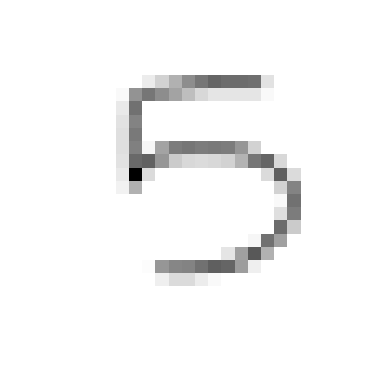

In [34]:
from PIL import Image
from keras.models import load_model

image_path = '5.png'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))
image = np.array(image) / 255.0
image = np.reshape(image, (1, 28, 28))

print(np.argmax(model.predict(image)))

plt.imshow(image[0], cmap='gray')
plt.axis('off')
plt.show()